In [1]:
from google.colab import files
uploaded = files.upload()

Saving DataScienceChallenge.csv to DataScienceChallenge.csv


In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/DataScienceChallenge.csv')

In [11]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.0,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   object 
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      900 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 973 non-null    object 
 9   Clicked on Ad             1000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [ ]:
print(df['Country'].unique())

In [ ]:
print(df['City'].unique())

In [164]:
df['Country'].nunique()

237

In [165]:
df['City'].nunique()

969

In [9]:
df.astype({'Daily Time Spent on Site': 'float64'}).dtypes

ValueError: ignored

In [ ]:
###Figured dropping the rows seemed better than subsituting the value. The string data seemed useless.

In [15]:
df1 = df.drop(df[df['Daily Time Spent on Site'].str.contains(' ',na=False)].index)    

In [17]:
df1.astype({'Daily Time Spent on Site': 'float64'}).dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                object
dtype: object

In [24]:
test = []
countries=[]
id = 1
for i in df1['Country']:
    if i not in test:
        countries.append({
            i:id
        })
        test.append(i)
    id+=1
    

In [ ]:
countries

In [ ]:
##I begin to code the string columns here. Lots of repetition.

In [34]:
df1["Country"] = df1["Country"].astype('category')
df1.dtypes


Daily Time Spent on Site      object
Age                            int64
Area Income                  float64
Daily Internet Usage         float64
Ad Topic Line                 object
City                          object
Male                           int64
Country                     category
Timestamp                     object
Clicked on Ad                 object
dtype: object

In [35]:
df1["Country.Code"] = df1["Country"].cat.codes
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country.Code
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96


In [36]:
df1.loc[df1['Country'] == 'Tunisia']

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country.Code
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215
41,64.24,30,59784.18,252.36,Front-line intermediate database,Zacharystad,0,Tunisia,2016-04-16 11:53:43,0,215
910,42.84,52,27073.27,182.20,Enhanced optimizing website,Lake Michellebury,1,Tunisia,2016-03-21 11:02:49,1,215


In [38]:
df1["City"] = df1["City"].astype('category')
df1["City.Code"] = df1["City"].cat.codes
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country.Code,City.Code
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,949
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,891
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,109
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,927
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,794


In [39]:
df1.loc[df1['City'] == 'Wrightburgh']

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country.Code,City.Code
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,949
362,79.72,28,66025.11,193.80,Configurable tertiary budgetary management,Wrightburgh,1,Albania,2016-05-20 12:17:59,0,1,949


In [47]:
new = df["Ad Topic Line"].str.split(" ", expand = True)
new.head()

,0,1,2,3,4,5
0,Cloned,5thgeneration,orchestration,None,None,None
1,Monitored,national,standardization,None,None,None
2,Organic,bottom-line,service-desk,None,None,None
3,Triple-buffered,reciprocal,time-frame,None,None,None
4,Robust,logistical,utilization,None,None,None


In [50]:
for i in range(len(new.columns)):
  df1['Ad word-'+str(i)] = new[i]

df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country.Code,City.Code,Ad word-0,Ad word-1,Ad word-2,Ad word-3,Ad word-4,Ad word-5
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,949,Cloned,5thgeneration,orchestration,None,None,None
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,891,Monitored,national,standardization,None,None,None
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,109,Organic,bottom-line,service-desk,None,None,None
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,927,Triple-buffered,reciprocal,time-frame,None,None,None
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,794,Robust,logistical,utilization,None,None,None


In [51]:
df1["Ad word-0"] = df1["Ad word-0"].astype('category')
df1["Ad word-1"] = df1["Ad word-1"].astype('category')
df1["Ad word-2"] = df1["Ad word-2"].astype('category')
df1["Ad word-3"] = df1["Ad word-3"].astype('category')
df1["Ad word-4"] = df1["Ad word-4"].astype('category')
df1["Ad word-5"] = df1["Ad word-5"].astype('category')

In [52]:
df1["Ad word-0"] = df1["Ad word-0"].cat.codes
df1["Ad word-1"] = df1["Ad word-1"].cat.codes
df1["Ad word-2"] = df1["Ad word-2"].cat.codes
df1["Ad word-3"] = df1["Ad word-3"].cat.codes
df1["Ad word-4"] = df1["Ad word-4"].cat.codes
df1["Ad word-5"] = df1["Ad word-5"].cat.codes
df1.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country.Code,City.Code,Ad word-0,Ad word-1,Ad word-2,Ad word-3,Ad word-4,Ad word-5
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,949,8,4,74,-1,-1,-1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,891,44,68,90,-1,-1,-1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,109,56,15,87,-1,-1,-1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,927,90,78,100,-1,-1,-1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,794,77,58,103,-1,-1,-1


In [80]:

df_no_na = df1.dropna()


In [81]:
df_no_na=df_no_na.drop(columns=['Ad Topic Line', 'City', 'Country'])


In [93]:
 df_no_na['Timestamp'] = pd.to_datetime(df_no_na['Timestamp']).astype(int) / 10**9

In [94]:
df_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  859 non-null    object 
 1   Age                       859 non-null    int64  
 2   Area Income               859 non-null    float64
 3   Daily Internet Usage      859 non-null    float64
 4   Male                      859 non-null    int64  
 5   Timestamp                 859 non-null    float64
 6   Clicked on Ad             859 non-null    object 
 7   Country.Code              859 non-null    int16  
 8   City.Code                 859 non-null    int16  
 9   Ad word-0                 859 non-null    int8   
 10  Ad word-1                 859 non-null    int8   
 11  Ad word-2                 859 non-null    int8   
 12  Ad word-3                 859 non-null    int8   
 13  Ad word-4                 859 non-null    int8   
 14  Ad word-5 

In [ ]:
####I give up here

In [ ]:
###Ok ill try.

In [83]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [95]:
feature_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male','Timestamp','Country.Code', 'City.Code', 'Ad word-0', 'Ad word-1', 'Ad word-2', 'Ad word-3', 'Ad word-4', 'Ad word-5']
X = df_no_na[feature_cols] # Features
y = df_no_na['Clicked on Ad'] # Target variable

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [97]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9534883720930233


In [101]:
!pip install graphviz

In [102]:
!pip install pydotplus

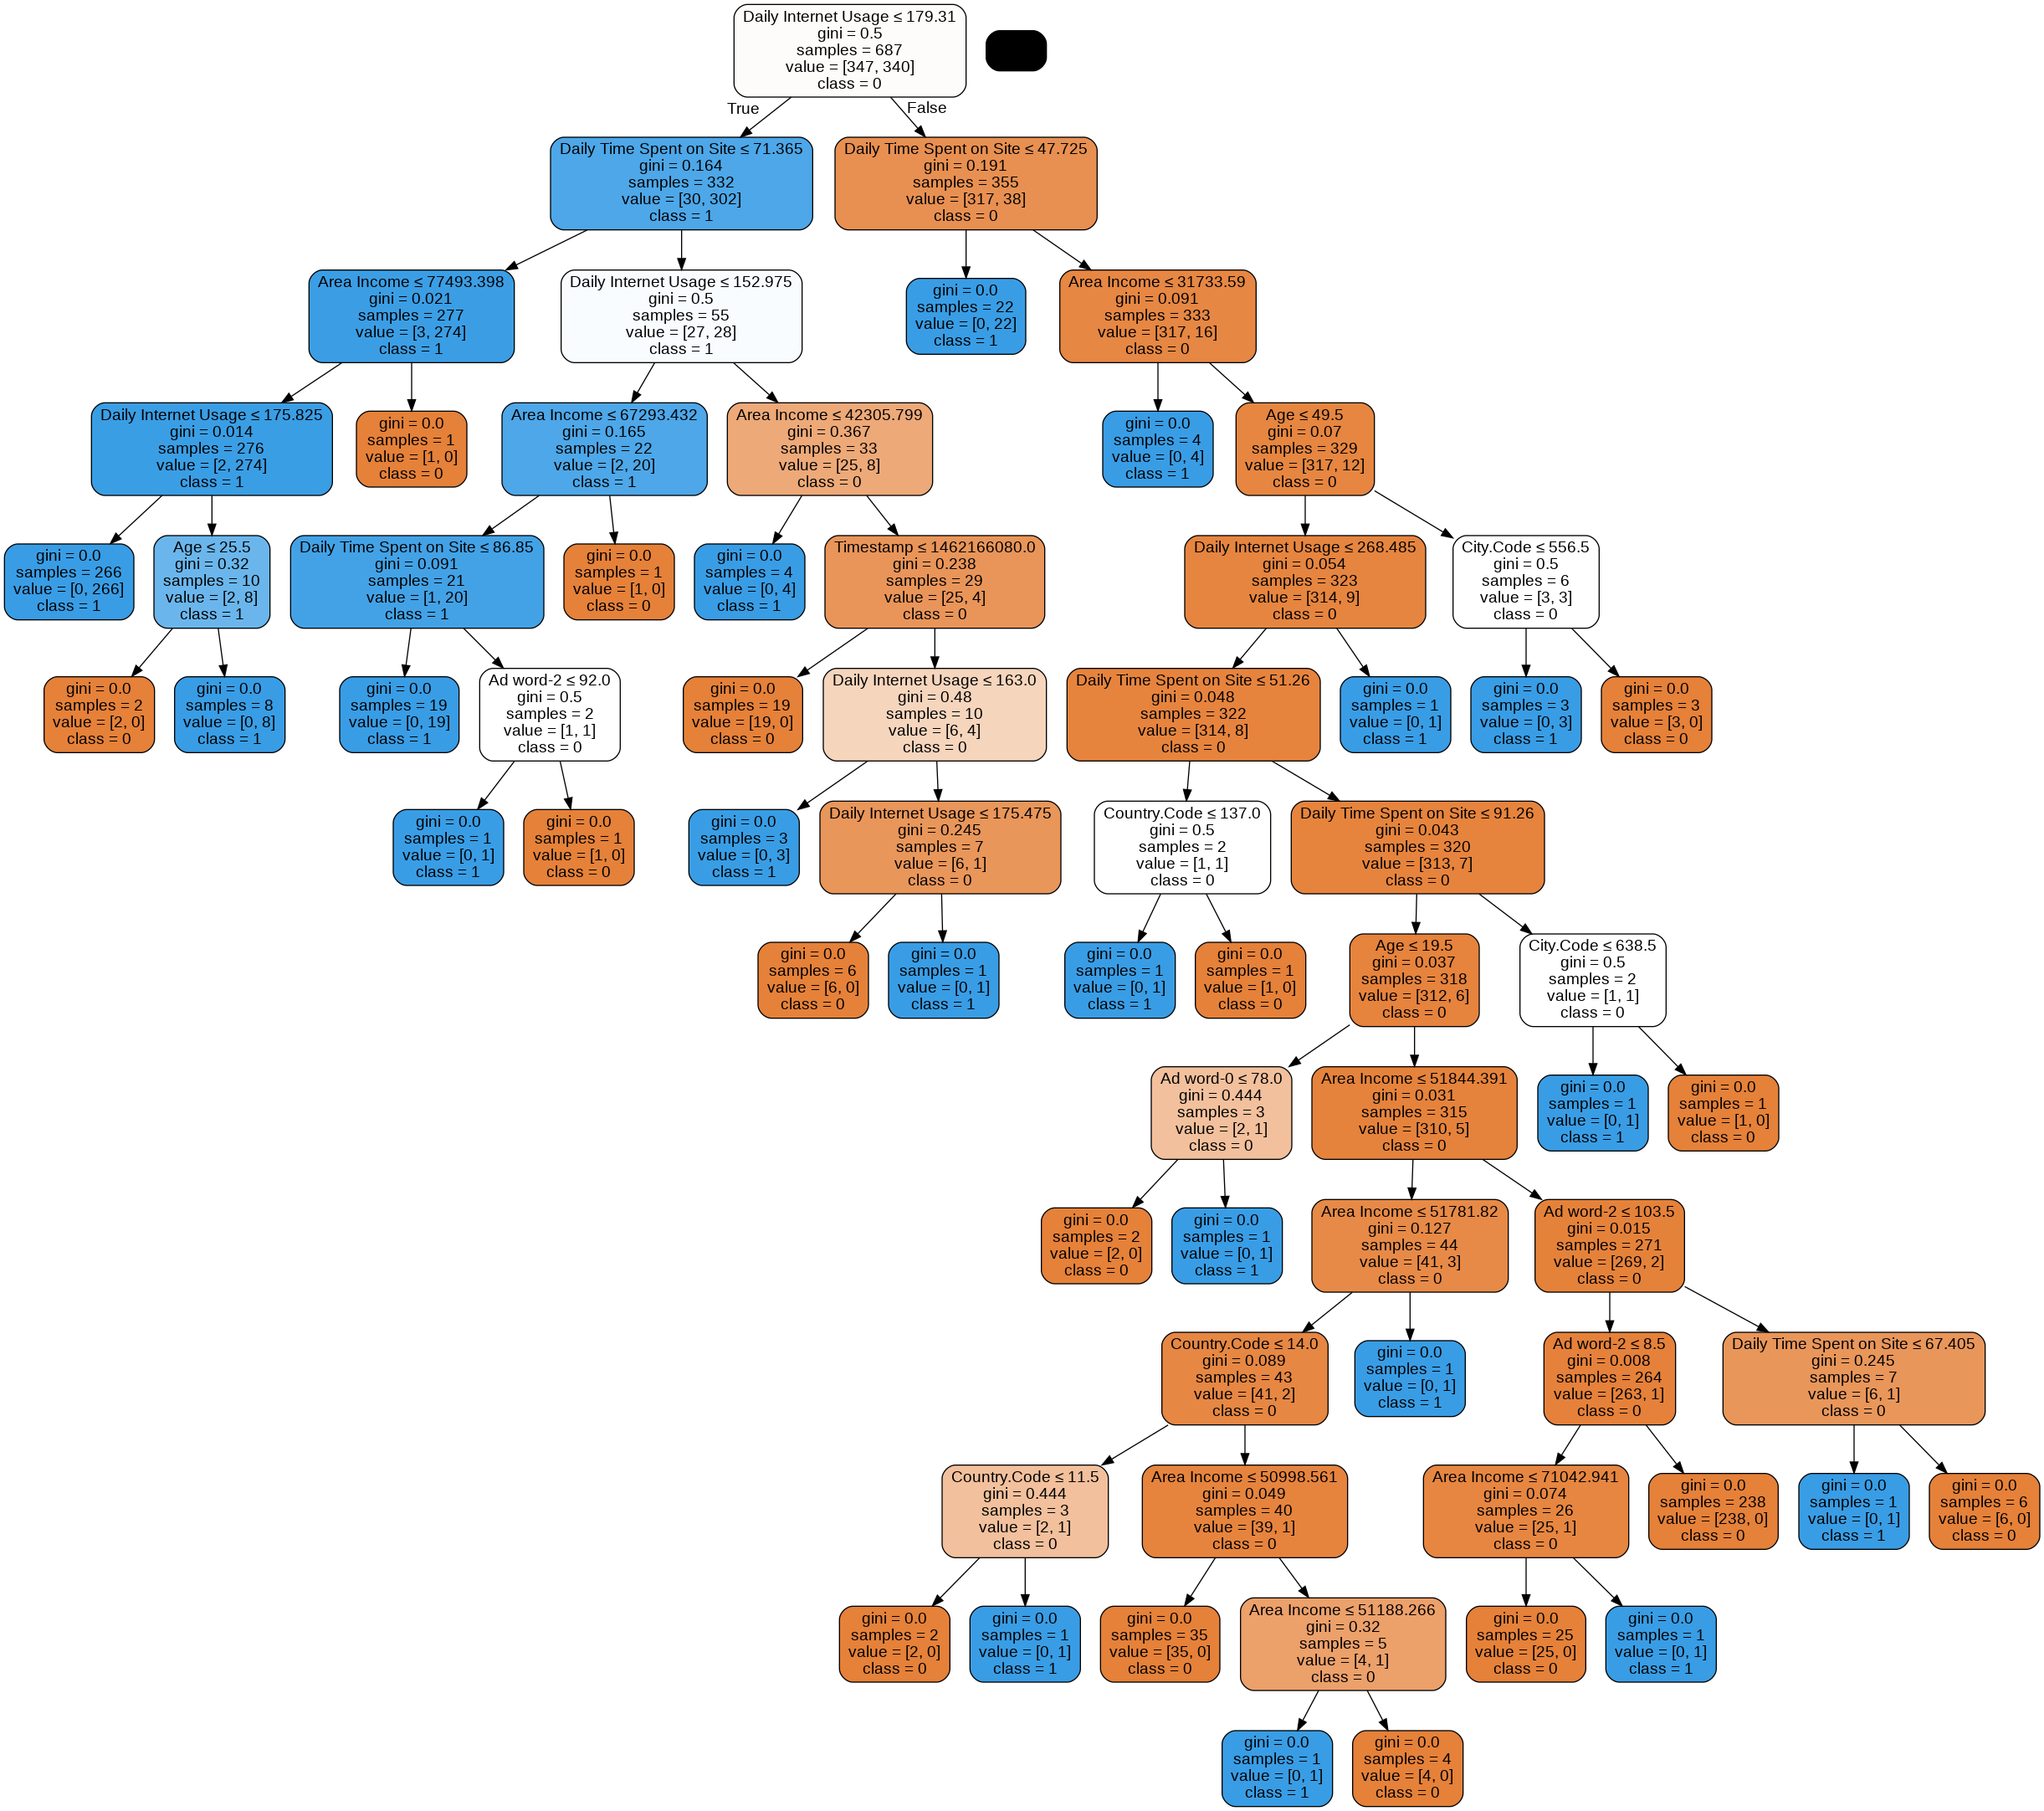

In [104]:
from sklearn.tree import export_graphviz

from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [111]:
# ======================= Faster Model w/ Less decisions===============================================================
# Create Decision Tree classifer object 
dlf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dlf = dlf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dlf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9593023255813954


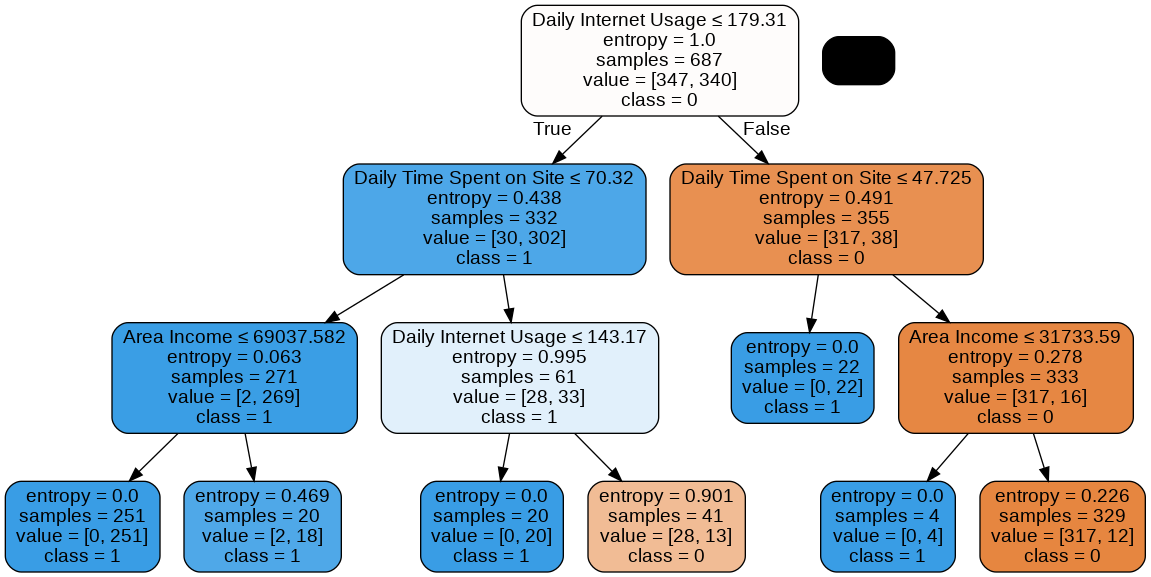

In [112]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dlf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [145]:
df_no_na.head(100)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Country.Code,City.Code,Ad word-0,Ad word-1,Ad word-2,Ad word-3,Ad word-4,Ad word-5
0,68.95,35,61833.90,256.09,0,1.459040e+09,0,215,949,8,4,74,-1,-1,-1
1,80.23,31,68441.85,193.77,1,1.459734e+09,0,147,891,44,68,90,-1,-1,-1
2,69.47,26,59785.94,236.50,0,1.457901e+09,0,184,109,56,15,87,-1,-1,-1
3,74.15,29,54806.18,245.89,1,1.452393e+09,0,103,927,90,78,100,-1,-1,-1
4,68.37,35,73889.99,225.58,0,1.464925e+09,0,96,794,77,58,103,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,74.02,32,72272.90,210.54,0,1.457535e+09,0,137,301,53,86,85,-1,-1,-1
110,66.63,60,60333.38,176.98,0,1.452987e+09,1,125,504,95,93,59,-1,-1,-1
111,63.24,53,65229.13,235.78,1,1.467520e+09,1,116,455,34,47,94,-1,-1,-1
112,71.0,22,56067.38,211.87,0,1.457938e+09,0,63,18,27,88,77,-1,-1,-1


In [114]:
Trial_Data = np.array([68.95, 35, 61833.90, 256.09, 0, 1.459040e+09, 215, 949, 8, 4, 74, -1, -1, -1])
Trial_Data = Trial_Data.reshape((-1, 14))
Trial_Data = Trial_Data.astype(float)

###['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male','Timestamp','Country.Code', 'City.Code', 'Ad word-0', 'Ad word-1', 'Ad word-2', 'Ad word-3', 'Ad word-4', 'Ad word-5']

In [118]:
clf.predict(Trial_Data)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


'1'

In [117]:
Trial_Data_Test2 = np.array([66.63, 60, 60333.38, 176.92, 0, 1.452987e+09, 125, 504, 95, 93, 59, -1, -1, -1])
Trial_Data_Test2 = Trial_Data.reshape((-1, 14))
Trial_Data_Test2 = Trial_Data.astype(float)

In [ ]:
clf.predict(Trial_Data_Test2)[0]

In [ ]:
#####Dimensionality. I haven't tested for dimensionality and fitting.

In [123]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import string
import random

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, make_regression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [137]:
import tubesml as tml

In [146]:
df_test = df_no_na.drop(['Timestamp'],axis=1)

In [ ]:
df_test.head()

In [149]:
pca = tml.DfPCA(n_components=0.8)
df_pca = pca.fit_transform(df_no_na.drop('Clicked on Ad', axis=1))
df_pca.head(10)

,pca_0
0,-1.097996e+06
1,-4.040449e+05
2,-2.236644e+06
3,-7.744907e+06
4,4.786991e+06
5,3.530231e+06
6,-6.123214e+06
7,-2.823170e+06
8,8.340351e+05
9,8.063385e+06


In [157]:
pca_test = tml.DfPCA(n_components=0.80)
df_pca_test = pca_test.fit_transform(df_test.drop('Clicked on Ad', axis=1))
df_pca_test.head(10)

,pca_0
0,-6577.218697
1,-13185.115409
2,-4529.761545
3,450.522876
4,-18633.324626
5,-4505.249401
6,1403.314947
7,30663.347718
8,-13605.279683
9,-385.671604


In [ ]:
##I was under the impression that the timestamp was so large a number that it reduced dimensionality in the pca. But instead it creates one principal component anyways. At this point im under the
##impression that the data doesn't need to be reduced.

In [161]:
pca_test = tml.DfPCA(n_components=0.99998)
df_pca_test = pca_test.fit_transform(df_test.drop('Clicked on Ad', axis=1))
df_pca_test.head(10)

,pca_0,pca_1,pca_2,pca_3
0,-6577.218697,-474.511178,-93.348673,66.838886
1,-13185.115409,-419.937597,-25.016119,-1.593646
2,-4529.761545,367.120169,-66.940437,52.201843
3,450.522876,-446.914796,13.820592,65.385008
4,-18633.324626,-326.149663,26.231006,21.674260
5,-4505.249401,197.330677,-41.293331,41.861275
6,1403.314947,434.928674,-29.442550,32.225669
7,30663.347718,-162.918479,96.574782,-11.530233
8,-13605.279683,-401.579489,42.215478,25.571285
9,-385.671604,-222.970376,41.717348,5.564538


In [ ]:
##I mean that's hilarious. I'm under the impression there's no reason to compress and run another model. So the above decision tree is my final model, which can be tested below.

In [ ]:
Trial_Data = np.array([68.95, 35, 61833.90, 256.09, 0, 1.459040e+09, 215, 949, 8, 4, 74, -1, -1, -1])
Trial_Data = Trial_Data.reshape((-1, 14))
Trial_Data = Trial_Data.astype(float)

In [ ]:
clf.predict(Trial_Data)[0]

In [ ]:
#Currently can only be tested using coded variables and not the original string.